# Credit Card Fraud Detection



## What is Credit Card Fraud?

Credit card fraud is when someone uses another person's credit card or account information to make unauthorized purchases or access funds through cash advances. Credit card fraud doesn’t just happen online; it happens in brick-and-mortar stores, too. As a business owner, you can avoid serious headaches – and unwanted publicity – by recognizing potentially fraudulent use of credit cards in your payment environment.


## Problem Statement:

The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be a fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

## data
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


Link: https://www.kaggle.com/mlg-ulb/creditcardfraud


## Three challenges surrounding credit card fraud

- It's not always easy to agree on ground truth for what "fraud" means.
- Regardless of how you define ground truth, the vast majority of charges are not fraudulent.
- Most merchants aren't experts at evaluating the business impact of fraud.



## Approach

* Training a model on a balanced dataset optimizes performance on validation data.
* However, the goal is to optimize performance on the imbalanced production dataset. You ultimately need to find a balance that works best in production.
* One solution to this problem is: Use all fraudulent transactions, but subsample non-fraudulent transactions as needed to hit our target rate.

**Since all features are anonymous, we will focus our analysis on non-anonymized features: Time, Amount**

1. How different is the amount of money used in different transaction classes?
2. Do fraudulent transactions occur more often during a certain frames?







In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D ,MaxPooling1D
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization
from keras.optimizers import Adam
print(tf.__version__)

2.2.0


Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import  StandardScaler

In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1. Exploratory Data Analysis

In [4]:
# summarize the shape of the dataset
print(data.shape)

(284807, 31)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


### Let us now check the missing values in the dataset

In [7]:
data.isnull().sum().sum()

0

In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**The only non-transformed variables to work with are:**
- Time
- Amount
- Class (1: fraud, 0: not_fraud)

In [9]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

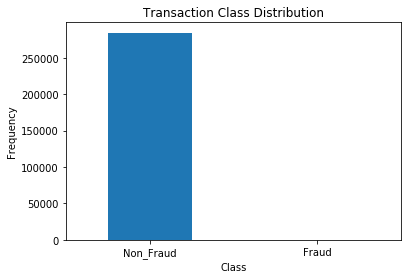

In [10]:
LABELS = ["Non_Fraud", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

In [11]:
fraud = data[data['Class']==1]
non_fraud= data[data['Class']==0]

In [12]:
print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {non_fraud.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


In [13]:
#How different are the amount of money used in different transaction classes?

pd.concat([fraud.Amount.describe(), non_fraud.Amount.describe()], axis=1)

,Amount,Amount
count,492.00,284315.00
mean,122.21,88.29
std,256.68,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,2125.87,25691.16


In [14]:
#Do fraudulent transactions occur more often during certain time frame ?
pd.concat([fraud.Time.describe(), non_fraud.Time.describe()], axis=1)

,Time,Time
count,492.00,284315.00
mean,80746.81,94838.20
std,47835.37,47484.02
min,406.00,0.00
25%,41241.50,54230.00
50%,75568.50,84711.00
75%,128483.00,139333.00
max,170348.00,172792.00


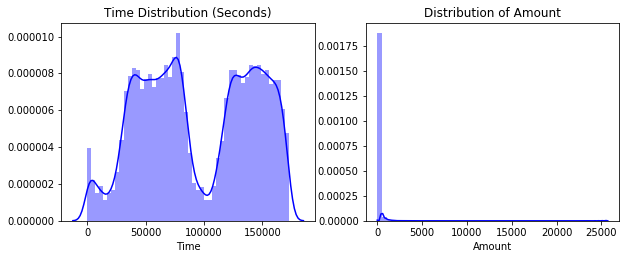

In [15]:
# plot the time feature
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.distplot(data['Time'], color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(data['Amount'],color='blue');

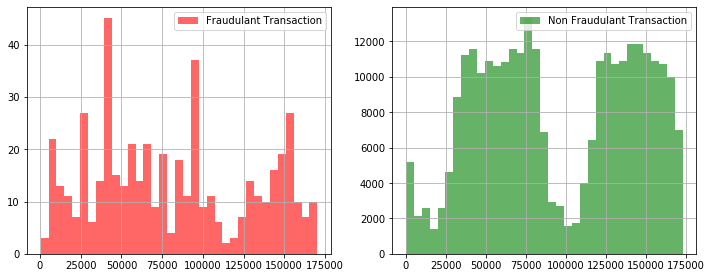

In [16]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='red', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='green', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. 

Doesn't seem like the time of transaction really matters here as per above observation. 


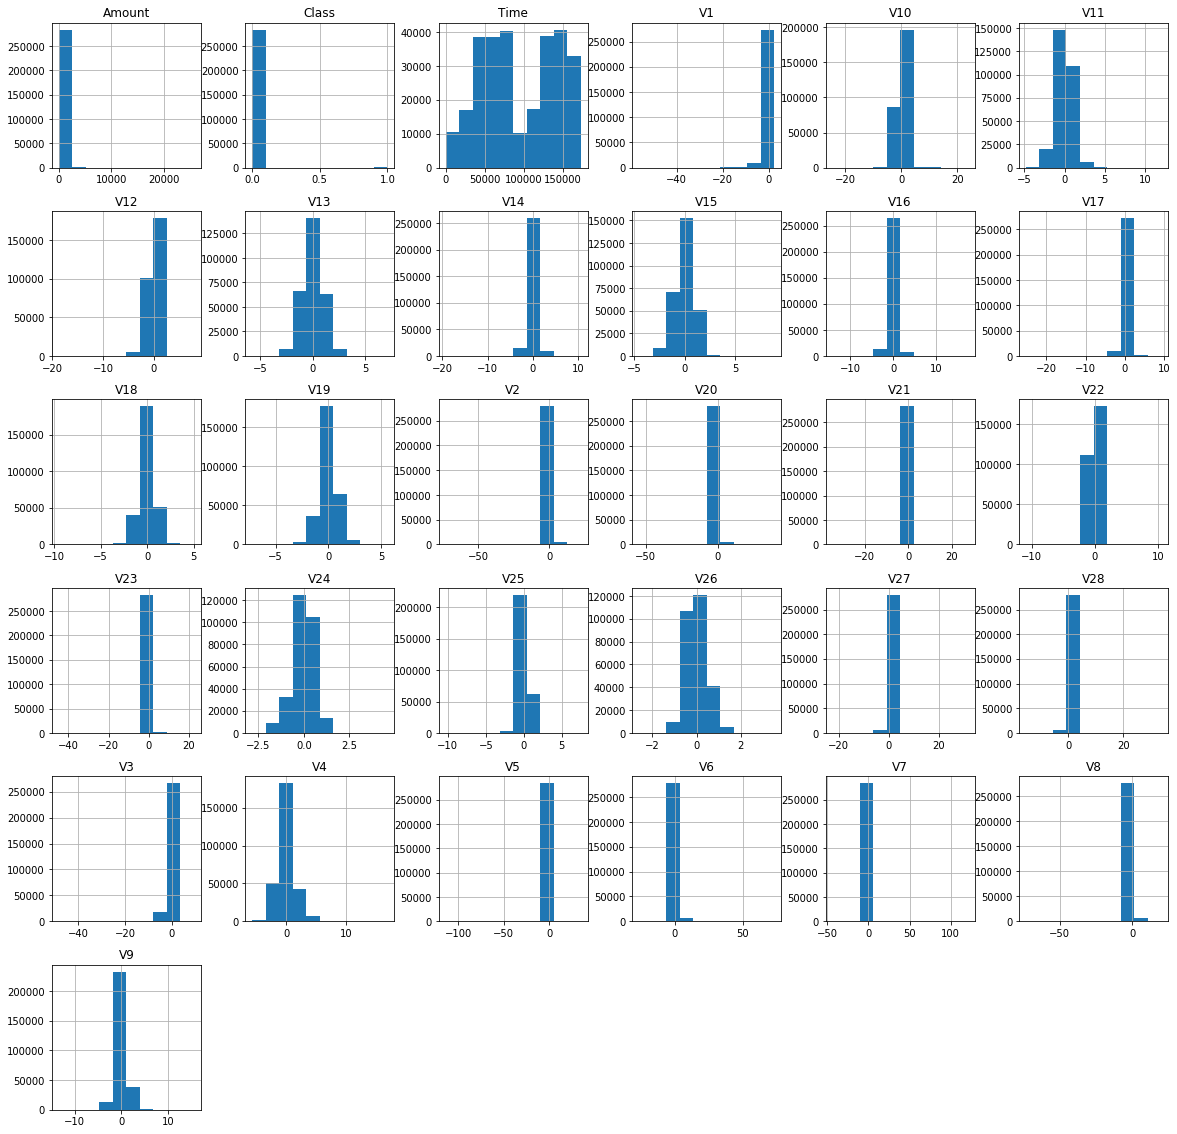

In [17]:
#Now let us take a sample of the dataset for out modelling and prediction

data.hist(figsize=(20, 20));

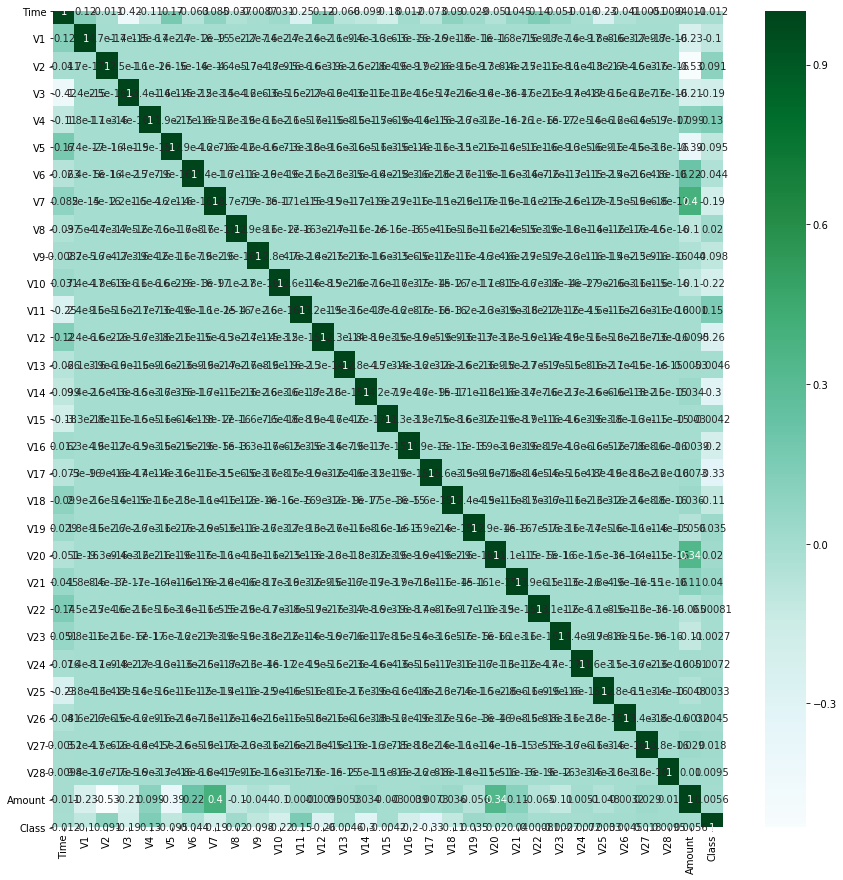

In [18]:
# heatmap to find any high correlations

plt.figure(figsize=(15,15))
sns.heatmap(data=data.corr(),annot=True, cmap="BuGn")
plt.show();

#### Highest correlations 

- Time & V3 (-0.42)
- Amount & V2 (-0.53)
- Amount & V4 (0.4)


While these correlations are high, I don't expect it to run the risk of multicollinearity.

The correlation matrix shows also that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

## Data Pre-processing

Time and Amount should be scaled as the other columns.


In [19]:
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v,test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(label, prediction, train=True):
    if train:
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

## Model Building (Imbalanced Dataset)

### 1. Convolutional Neural Network (CNNs)


In [21]:
X_train_d = np.expand_dims(X_train, -1)
X_test_d = np.expand_dims(X_test, -1)
X_validate_d = np.expand_dims(X_validate, -1)

In [22]:
print(f"TRAINING: X_train: {X_train_d.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate_d.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test_d.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30, 1), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30, 1), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30, 1), y_test: (85443,)


In [23]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train_d[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 27, 128)           1

In [25]:
# weights = {0:1, 1:5}
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=[keras.metrics.AUC()])
r = model.fit(X_train_d, y_train, 
              validation_data=(X_validate_d, y_validate),
              batch_size=500, 
              epochs=epochs, 
#               class_weight=weights
             )

Epoch 1/20
319/319 [==============================] - 180s 565ms/step - loss: 0.0730 - auc: 0.8080 - val_loss: 0.0063 - val_auc: 0.9027
Epoch 2/20
319/319 [==============================] - 208s 651ms/step - loss: 0.0119 - auc: 0.8733 - val_loss: 0.0103 - val_auc: 0.8983
Epoch 3/20
319/319 [==============================] - 164s 514ms/step - loss: 0.0106 - auc: 0.8696 - val_loss: 0.0068 - val_auc: 0.8984
Epoch 4/20
319/319 [==============================] - 144s 453ms/step - loss: 0.0086 - auc: 0.8854 - val_loss: 0.0059 - val_auc: 0.9129
Epoch 5/20
319/319 [==============================] - 147s 461ms/step - loss: 0.0079 - auc: 0.8949 - val_loss: 0.0057 - val_auc: 0.9056
Epoch 6/20
319/319 [==============================] - 144s 451ms/step - loss: 0.0066 - auc: 0.9128 - val_loss: 0.0055 - val_auc: 0.9056
Epoch 7/20
319/319 [==============================] - 144s 451ms/step - loss: 0.0073 - auc: 0.8987 - val_loss: 0.0053 - val_auc: 0.9128
Epoch 8/20
319/319 [============================

In [26]:
score = model.evaluate(X_test_d, y_test)
print(score)

2671/2671 [==============================] - 17s 6ms/step - loss: 0.0025 - auc: 0.9591
[0.0024770419113337994, 0.9591323733329773]


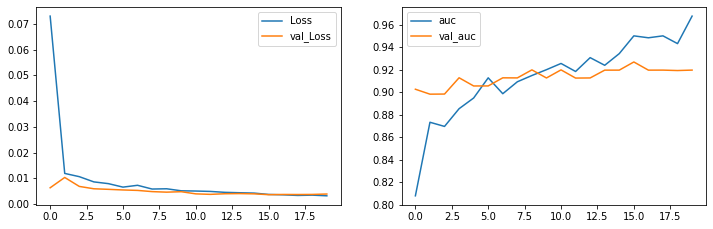

In [27]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['auc'], label='auc')
plt.plot(r.history['val_auc'], label='val_auc')
plt.legend()

In [28]:
y_train_pred = model.predict(X_train_d)
y_test_pred = model.predict(X_test_d)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

Train Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:	Precision Score: 91.57%
			Recall Score: 79.44%
			F1 score: 85.07%
_______________________________________________
Confusion Matrix: 
 [[159183     21]
 [    59    228]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:	Precision Score: 85.50%
			Recall Score: 82.35%
			F1 score: 83.90%
_______________________________________________
Confusion Matrix: 
 [[85288    19]
 [   24   112]]



## Adding MaxPooling


In [29]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train_d[0].shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

# weights = {0:1, 1:5}
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=[keras.metrics.AUC()])
r = model.fit(X_train_d, y_train, 
              validation_data=(X_validate_d, y_validate),
              batch_size=50, 
              epochs=epochs, 
#               class_weight=weights
             )

Epoch 1/50
3190/3190 [==============================] - 34s 11ms/step - loss: 0.0397 - auc_1: 0.6099 - val_loss: 0.0147 - val_auc_1: 0.9313
Epoch 2/50
3190/3190 [==============================] - 34s 11ms/step - loss: 0.0090 - auc_1: 0.8614 - val_loss: 0.0069 - val_auc_1: 0.9070
Epoch 3/50
3190/3190 [==============================] - 36s 11ms/step - loss: 0.0074 - auc_1: 0.8869 - val_loss: 0.0063 - val_auc_1: 0.9147
Epoch 4/50
3190/3190 [==============================] - 40s 13ms/step - loss: 0.0063 - auc_1: 0.9012 - val_loss: 0.0058 - val_auc_1: 0.9376
Epoch 5/50
3190/3190 [==============================] - 31s 10ms/step - loss: 0.0056 - auc_1: 0.9068 - val_loss: 0.0050 - val_auc_1: 0.9313
Epoch 6/50
3190/3190 [==============================] - 31s 10ms/step - loss: 0.0050 - auc_1: 0.9261 - val_loss: 0.0049 - val_auc_1: 0.9248
Epoch 7/50
3190/3190 [==============================] - 31s 10ms/step - loss: 0.0050 - auc_1: 0.9195 - val_loss: 0.0052 - val_auc_1: 0.9236
Epoch 8/50
3190/3190

In [30]:
score = model.evaluate(X_test_d, y_test)
print(score)

2671/2671 [==============================] - 32s 12ms/step - loss: 0.0027 - auc_1: 0.9552 1s - 
[0.0027039088308811188, 0.9552481770515442]


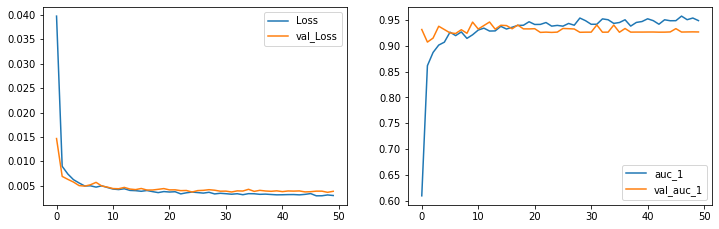

In [31]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['auc_1'], label='auc_1')
plt.plot(r.history['val_auc_1'], label='val_auc_1')
plt.legend()

In [32]:
y_train_pred = model.predict(X_train_d)
y_test_pred = model.predict(X_test_d)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

Train Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:	Precision Score: 88.00%
			Recall Score: 84.32%
			F1 score: 86.12%
_______________________________________________
Confusion Matrix: 
 [[159171     33]
 [    45    242]]

Test Result:
Accuracy Score: 99.94%
_______________________________________________
Classification Report:	Precision Score: 78.00%
			Recall Score: 86.03%
			F1 score: 81.82%
_______________________________________________
Confusion Matrix: 
 [[85274    33]
 [   19   117]]



________

## Model Building (balanced Dataset)

In [33]:
X = data.drop('Class', axis=1)
y = data.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Concatinating X_train and y_train
df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2557,2105.00,-2.29,-0.48,0.82,-1.71,0.82,-1.66,0.94,-0.54,1.32,...,-0.21,0.91,0.87,0.42,0.31,-0.78,0.39,-0.15,1.00,0
247823,153702.00,-0.31,-4.06,-3.40,0.70,0.10,1.53,1.55,-0.04,0.02,...,0.85,-0.09,-0.94,-0.83,-0.50,0.65,-0.29,0.11,1194.28,0
152342,97283.00,-1.81,-0.57,2.27,-0.96,-1.21,1.52,-1.42,0.90,1.96,...,-0.51,-0.42,-0.27,0.01,0.47,0.84,-0.06,0.09,75.00,0
103385,68628.00,1.19,0.18,0.14,0.46,-0.05,-0.11,-0.16,0.16,-0.07,...,-0.24,-0.74,0.12,-0.37,0.13,0.13,-0.02,0.01,1.98,0
8771,11951.00,-0.96,0.70,1.10,-1.55,0.67,0.51,0.33,0.27,1.38,...,-0.28,-0.47,-0.12,-1.39,-0.24,0.79,0.35,0.22,37.31,0


In [34]:
df.shape

(199364, 31)

In [35]:
from sklearn.utils import resample

fraud_class = df[df.Class == 1]
non_fraud_class = df[df.Class == 0]

non_fraud_downsample = resample(non_fraud_class, replace=False, 
                               n_samples=fraud_class.shape[0], 
                               random_state=42)

df_2 = pd.concat([non_fraud_downsample, fraud_class])
df_2.Class.value_counts()

1    356
0    356
Name: Class, dtype: int64

In [36]:
df_2.shape

(712, 31)

In [37]:
scaler = StandardScaler()

X = df_2.drop('Class', axis=1)
y = df_2.Class

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)
X_test = scaler.transform(X_test)

In [38]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_validate = np.expand_dims(X_validate, -1)

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)
print(X_test.shape)
print(y_test.shape)

(498, 30, 1)
(498,)
(214, 30, 1)
(214,)
(85443, 30, 1)
(85443,)


In [39]:
epochs = 150
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# weights = {0:1, 1:5}
model.compile(optimizer=Adam(0.00001), loss='binary_crossentropy', metrics=["accuracy"])
r = model.fit(X_train, y_train, 
              validation_data=(X_validate, y_validate),
              batch_size=50, 
              epochs=epochs, 
#               class_weight=weights
             )

Epoch 1/150
10/10 [==============================] - 2s 165ms/step - loss: 0.9784 - accuracy: 0.5281 - val_loss: 0.6823 - val_accuracy: 0.6449
Epoch 2/150
10/10 [==============================] - 1s 129ms/step - loss: 0.9004 - accuracy: 0.6004 - val_loss: 0.6642 - val_accuracy: 0.7477
Epoch 3/150
10/10 [==============================] - 2s 207ms/step - loss: 0.8215 - accuracy: 0.6466 - val_loss: 0.6468 - val_accuracy: 0.6916
Epoch 4/150
10/10 [==============================] - 2s 191ms/step - loss: 0.7081 - accuracy: 0.6787 - val_loss: 0.6324 - val_accuracy: 0.6636
Epoch 5/150
10/10 [==============================] - 2s 151ms/step - loss: 0.6339 - accuracy: 0.7189 - val_loss: 0.6211 - val_accuracy: 0.6636
Epoch 6/150
10/10 [==============================] - 2s 181ms/step - loss: 0.5711 - accuracy: 0.7570 - val_loss: 0.6104 - val_accuracy: 0.6589
Epoch 7/150
10/10 [==============================] - 2s 176ms/step - loss: 0.5400 - accuracy: 0.7590 - val_loss: 0.5996 - val_accuracy: 0.6542

Epoch 58/150
10/10 [==============================] - 2s 220ms/step - loss: 0.2605 - accuracy: 0.9056 - val_loss: 0.2112 - val_accuracy: 0.9299
Epoch 59/150
10/10 [==============================] - 2s 185ms/step - loss: 0.2495 - accuracy: 0.9016 - val_loss: 0.2114 - val_accuracy: 0.9299
Epoch 60/150
10/10 [==============================] - 2s 185ms/step - loss: 0.2593 - accuracy: 0.9096 - val_loss: 0.2125 - val_accuracy: 0.9299
Epoch 61/150
10/10 [==============================] - 2s 185ms/step - loss: 0.2247 - accuracy: 0.9137 - val_loss: 0.2129 - val_accuracy: 0.9299
Epoch 62/150
10/10 [==============================] - 2s 180ms/step - loss: 0.2993 - accuracy: 0.9076 - val_loss: 0.2133 - val_accuracy: 0.9299
Epoch 63/150
10/10 [==============================] - 2s 193ms/step - loss: 0.2399 - accuracy: 0.9197 - val_loss: 0.2129 - val_accuracy: 0.9299
Epoch 64/150
10/10 [==============================] - 2s 213ms/step - loss: 0.2943 - accuracy: 0.9036 - val_loss: 0.2139 - val_accuracy:

Epoch 115/150
10/10 [==============================] - 2s 181ms/step - loss: 0.2097 - accuracy: 0.9237 - val_loss: 0.2276 - val_accuracy: 0.9346
Epoch 116/150
10/10 [==============================] - 2s 172ms/step - loss: 0.1954 - accuracy: 0.9237 - val_loss: 0.2282 - val_accuracy: 0.9346
Epoch 117/150
10/10 [==============================] - 2s 174ms/step - loss: 0.2102 - accuracy: 0.9116 - val_loss: 0.2286 - val_accuracy: 0.9346
Epoch 118/150
10/10 [==============================] - 2s 187ms/step - loss: 0.2305 - accuracy: 0.9137 - val_loss: 0.2287 - val_accuracy: 0.9346
Epoch 119/150
10/10 [==============================] - 2s 181ms/step - loss: 0.2011 - accuracy: 0.9257 - val_loss: 0.2293 - val_accuracy: 0.9346
Epoch 120/150
10/10 [==============================] - 2s 181ms/step - loss: 0.1938 - accuracy: 0.9237 - val_loss: 0.2292 - val_accuracy: 0.9393
Epoch 121/150
10/10 [==============================] - 2s 181ms/step - loss: 0.1938 - accuracy: 0.9297 - val_loss: 0.2294 - val_ac

In [40]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 75s 28ms/step - loss: 0.1189 - accuracy: 0.9660
[0.11893285065889359, 0.9660241603851318]


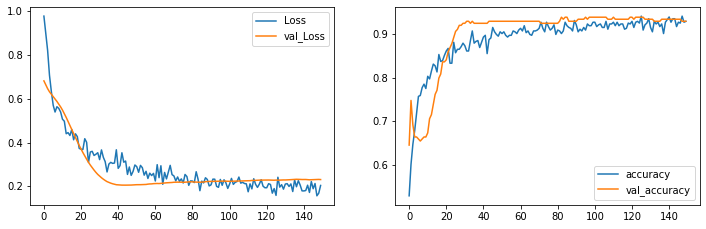

In [41]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [42]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

Train Result:
Accuracy Score: 95.58%
_______________________________________________
Classification Report:	Precision Score: 98.78%
			Recall Score: 92.72%
			F1 score: 95.65%
_______________________________________________
Confusion Matrix: 
 [[234   3]
 [ 19 242]]

Test Result:
Accuracy Score: 96.60%
_______________________________________________
Classification Report:	Precision Score: 4.11%
			Recall Score: 91.18%
			F1 score: 7.87%
_______________________________________________
Confusion Matrix: 
 [[82416  2891]
 [   12   124]]

